In [2]:
import sys
import scipy as sp
import sklearn
import IPython
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

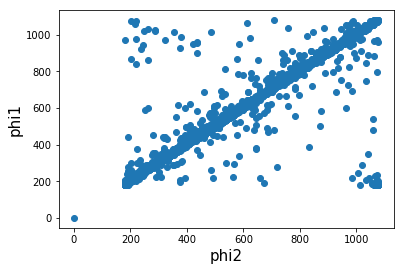

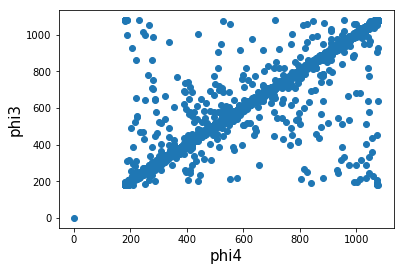

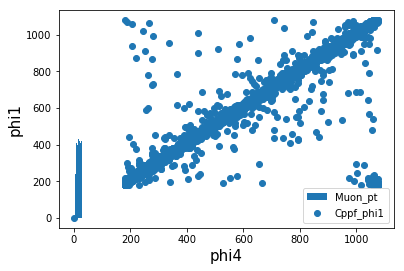

In [3]:
features = pd.read_csv("bdt_training_features_clean.csv")
target = pd.read_csv("bdt_training_target_clean.csv")

plt.scatter(features.Cppf_phi2, features.Cppf_phi1)
plt.xlabel("phi2", fontsize=15)
plt.ylabel("phi1", fontsize=15)
plt.show()

plt.scatter(features.Cppf_phi4, features.Cppf_phi3)
plt.xlabel("phi4", fontsize=15)
plt.ylabel("phi3", fontsize=15)
plt.show()

plt.scatter(features.Cppf_phi4, features.Cppf_phi1)
plt.xlabel("phi4", fontsize=15)
plt.ylabel("phi1", fontsize=15)
plt.hist(target.Muon_pt, bins=50, label="Muon_pt")
plt.legend()
plt.show()


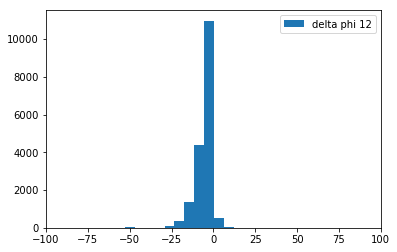

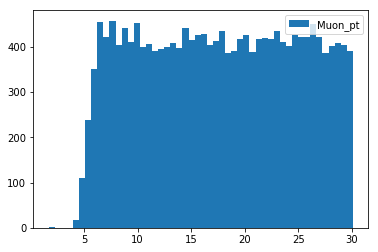

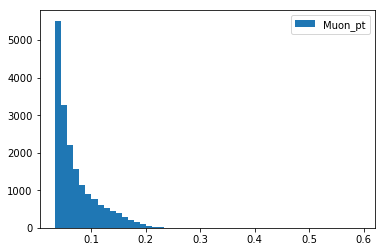

In [13]:
plt.hist(features.Cppf_phi2-features.Cppf_phi1, bins=300, label="delta phi 12")
plt.legend()
plt.xlim([-100,100])
plt.show()

plt.hist(target.Muon_pt, bins=50, label="Muon_pt")
plt.legend()
plt.show()

plt.hist(1./target.Muon_pt, bins=50, label="Muon_pt")
plt.legend()
plt.show()

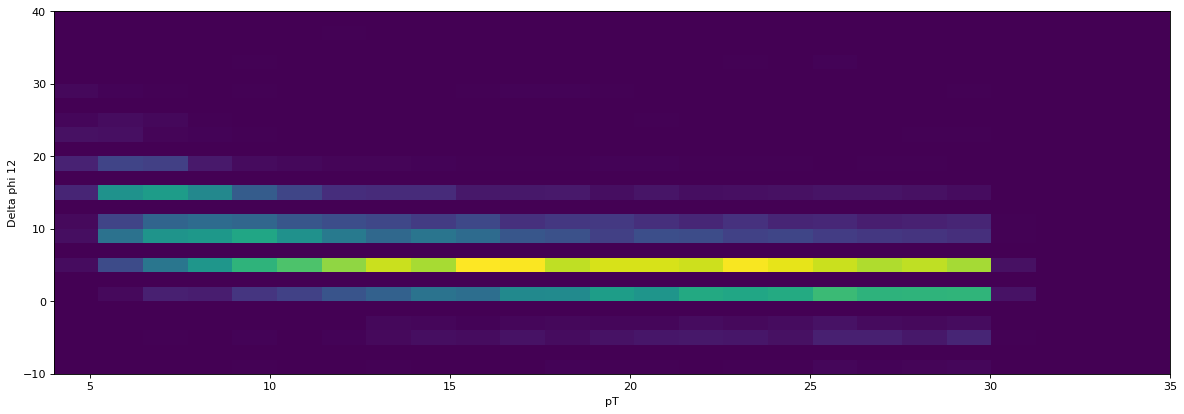

In [83]:
fig=plt.figure(num=None, figsize=(18,6), dpi=80, facecolor='w', edgecolor='k')
plt.hist2d((target.Muon_pt),(features.Cppf_phi1-features.Cppf_phi2),bins=(25,25),range=((4,35),(-10,40)))
plt.xlabel("pT")
plt.ylabel("Delta phi 12")
plt.show()

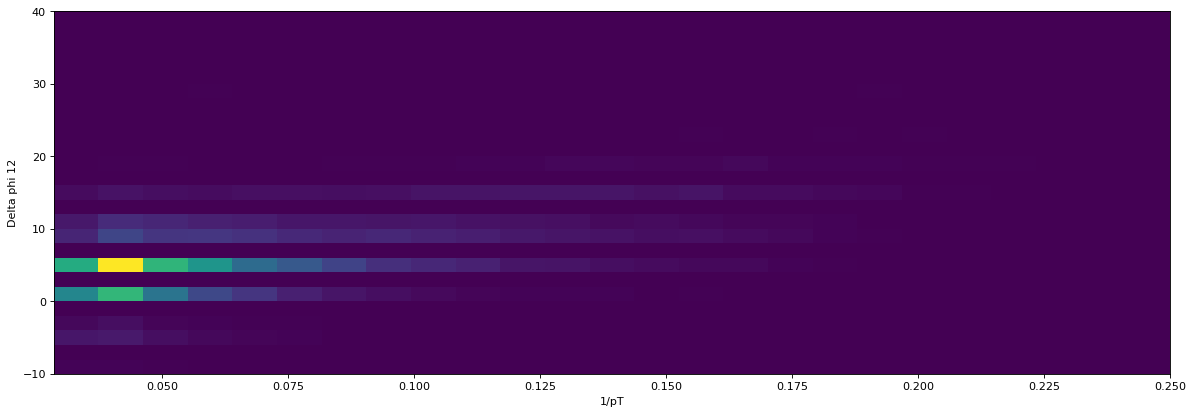

In [87]:
fig=plt.figure(num=None, figsize=(18,6), dpi=80, facecolor='w', edgecolor='k')
plt.hist2d((1./target.Muon_pt),(features.Cppf_phi1-features.Cppf_phi2),bins=(25,25),range=((1./35.,1./4.),(-10,40)))
plt.xlabel("1/pT")
plt.ylabel("Delta phi 12")
plt.show()

##WE NEED A 1/pT flat sample!

In [71]:
print("Keys of Features: \n{}".format(features.keys()))
print("Keys of Target: \n{}".format(target.keys()))

Keys of Features: 
Index(['Cppf_phi1', 'Cppf_phi2', 'Cppf_phi3', 'Cppf_phi4', 'Cppf_theta1',
       'Cppf_theta2', 'Cppf_theta3', 'Cppf_theta4', 'cluster_size1',
       'cluster_size2', 'cluster_size3', 'cluster_size4', 'Deltaphi12',
       'Deltaphi23', 'Deltaphi34', 'Deltatheta12', 'Deltatheta23',
       'Deltatheta34'],
      dtype='object')
Keys of Target: 
Index(['Muon_pt'], dtype='object')


In [72]:
features.shape



(18177, 18)

In [73]:
target.shape

(18177, 1)

In [75]:
#the sample preparation
from sklearn.model_selection import train_test_split
Data = pd.DataFrame(features)
Target = target.Muon_pt
X_train, X_test, y_train, y_test = train_test_split(Data, Target, test_size=0.2,random_state=0)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(14541, 18) (14541,)
(3636, 18) (3636,)


In [76]:
# fit a linear model
from sklearn import datasets, linear_model
lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
predictions[0:5]


array([ 17.35166645,  17.84268163,  17.80293603,  16.87765802,  17.80188412])

In [77]:
print (model.score(X_test, y_test))
print (model.score(X_train, y_train))

0.00416220625118
0.00509183766561


## Until here everything makes sense but the scores are too low!

In [29]:
#the kneighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train.astype(int))



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [30]:
knn.predict(X_test)
knn.score(X_train, y_train.astype(int))



0.99415445980331474

In [31]:
knn.score(X_test, y_test.astype(int))

0.05253025302530253

In [33]:
#The training
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train.astype(int))

NameError: name 'DecisionTreeClassifier' is not defined

In [271]:
#prediction
prediction_tree = tree.predict(X_test)

In [272]:
tree.score(X_train, y_train.astype(int))

0.99620999438517688

In [273]:
tree.score(X_test, y_test.astype(int))

0.012914093206064009

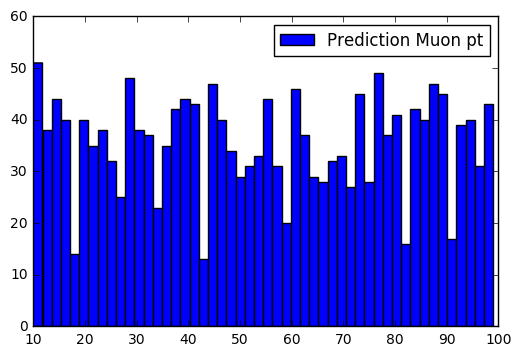

In [274]:

plt.hist(prediction_tree, bins=50, label="Prediction Muon pt")
plt.legend()
plt.show()

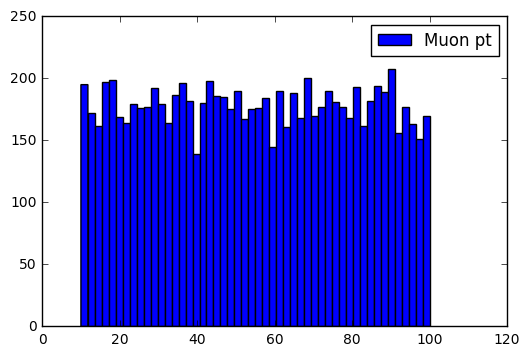

In [275]:
plt.hist(target.Muon_pt, bins=50, label="Muon pt")
plt.legend()
plt.show()

In [276]:
prediction_pt = np.array(prediction_tree)
display(prediction_pt)
print(prediction_tree.shape)

array([35, 31, 50, ..., 16, 99, 19])

(1781,)


In [277]:
pt = np.array(y_test)
display(pt)
print(y_test.shape)

array([ 26.777 ,  82.4017,  87.1135, ...,  56.2739,  83.8537,  29.2214])

(1781,)


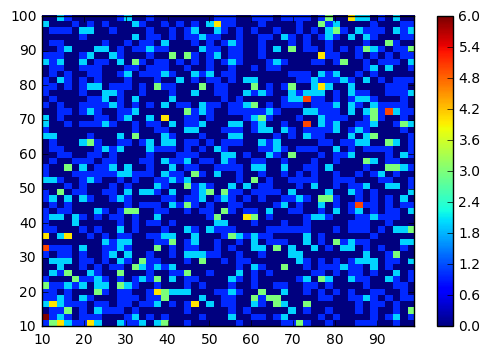

In [280]:
from matplotlib.pylab import hist
plt.hist2d(prediction_pt, pt, bins=50, label="Muon pt")
#plt.legend()
plt.colorbar()
plt.show()